In [1]:
pip install scikit-learn


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow 

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler ##this to make sure the features are on the same scale. 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import keras
from keras.models import Sequential ##for neural network and cnn
from keras.layers import Dense , Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.utils import to_categorical


In [5]:
df1=pd.read_csv(r"C:\Users\sara123\Downloads\archive\Arabic Handwritten Characters Dataset CSV\csvTestLabel 3360x1.csv")
df2=pd.read_csv(r"C:\Users\sara123\Downloads\archive\Arabic Handwritten Characters Dataset CSV\csvTestImages 3360x1024.csv")
df3=pd.read_csv(r"C:\Users\sara123\Downloads\archive\Arabic Handwritten Characters Dataset CSV\csvTrainLabel 13440x1.csv")
df4=pd.read_csv(r"C:\Users\sara123\Downloads\archive\Arabic Handwritten Characters Dataset CSV\csvTrainImages 13440x1024.csv")


In [6]:
#With the first task, each team needs to ensure the dataset is cleaned and the features are on the same scale. 

# Print the shape of df
print("df1",df1.shape)
print("df2",df2.shape)
print("df3",df3.shape)
print("df4",df4.shape)


df1 (3359, 1)
df2 (3359, 1024)
df3 (13439, 1)
df4 (13439, 1024)


In [7]:
# Print the columns of df
print("df1",df1.columns,"df2",df2.columns,"df3",df3.columns,"df4",df4.columns)
print("df1",df1.info(),"df2",df2.info(),"df3",df3.info(),"df4",df4.info())

df1 Index(['1'], dtype='object') df2 Index(['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9',
       ...
       '0.919', '0.920', '0.921', '0.922', '0.923', '0.924', '0.925', '0.926',
       '0.927', '0.928'],
      dtype='object', length=1024) df3 Index(['1'], dtype='object') df4 Index(['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9',
       ...
       '0.896', '0.897', '0.898', '0.899', '0.900', '0.901', '0.902', '0.903',
       '0.904', '0.905'],
      dtype='object', length=1024)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3359 entries, 0 to 3358
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       3359 non-null   float64
dtypes: float64(1)
memory usage: 26.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3359 entries, 0 to 3358
Columns: 1024 entries, 0 to 0.928
dtypes: float64(1024)
memory usage: 26.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13439 entries,

In [8]:
#data types
print("df1",df1.dtypes)
print("df2",df2.dtypes)
print("df3",df3.dtypes)
print("df4",df4.dtypes)


df1 1    float64
dtype: object
df2 0        float64
0.1      float64
0.2      float64
0.3      float64
0.4      float64
          ...   
0.924    float64
0.925    float64
0.926    float64
0.927    float64
0.928    float64
Length: 1024, dtype: object
df3 1    float64
dtype: object
df4 0        float64
0.1      float64
0.2      float64
0.3      float64
0.4      float64
          ...   
0.901    float64
0.902    float64
0.903    float64
0.904    float64
0.905    float64
Length: 1024, dtype: object


In [9]:
#extract the column names
cols1=df1.columns
cols2=df2.columns
cols3=df3.columns
cols4=df4.columns
df1[cols1].isnull().sum()
df2[cols2].isnull().sum()
df3[cols3].isnull().sum()
df4[cols4].isnull().sum()
#we have no empty col

0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.901    0
0.902    0
0.903    0
0.904    0
0.905    0
Length: 1024, dtype: int64

In [10]:
print("df1",df1.head())
print("df2",df2.head())
print("df3",df3.head())
print("df4",df4.head())

df1           1
0  0.000000
1  0.037037
2  0.037037
3  0.074074
4  0.074074
df2      0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.919  0.920  0.921  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   

   0.922  0.923  0.924  0.925  0.926  0.927  0.928  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0  

[5 rows x 1024 columns]
df3      1
0  0.0
1  0.0
2  0.0
3  0.0
4  0.0
df4      0  0.1  0.2  0.3  0.4  0.5  0.6  0.

In [11]:
# create a scaler object
scaler = MinMaxScaler()

# apply the scaler to each dataframe individually
test_y = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)
test_x = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)
train_y = pd.DataFrame(scaler.fit_transform(df3), columns=df3.columns)
train_x = pd.DataFrame(scaler.fit_transform(df4), columns=df4.columns)

test_y = df1.to_numpy()
train_y = df3.to_numpy()

print("test",train_y)
print("train",test_y)

test [[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]
train [[0.        ]
 [0.03703704]
 [0.03703704]
 ...
 [0.96296296]
 [1.        ]
 [1.        ]]


In [12]:
#ann
#Create a sequential model
model = Sequential()

#Add an input layer with the same number of nodes as the number of features in the data
model.add(Dense(train_x.shape[1], input_dim=train_x.shape[1], activation='relu'))

#Add a hidden layer with 10 nodes
model.add(Dense(10, activation='relu'))

#Add an output layer with 1 node
model.add(Dense(1, activation='sigmoid'))

#Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train the model
model.fit(train_x, train_y, epochs=10, batch_size=32, validation_data=(test_x, test_y))
ANN_Accuracy = model.evaluate(test_x, test_y)

Epoch 1/10
420/420 [==============================] - 11s 23ms/step - loss: 0.6325 - accuracy: 0.0635 - val_loss: 0.6000 - val_accuracy: 0.0655
Epoch 2/10
420/420 [==============================] - 10s 23ms/step - loss: 0.5763 - accuracy: 0.0688 - val_loss: 0.5754 - val_accuracy: 0.0667
Epoch 3/10
420/420 [==============================] - 12s 28ms/step - loss: 0.5474 - accuracy: 0.0695 - val_loss: 0.5649 - val_accuracy: 0.0673
Epoch 4/10
420/420 [==============================] - 10s 23ms/step - loss: 0.5274 - accuracy: 0.0709 - val_loss: 0.5627 - val_accuracy: 0.0676
Epoch 5/10
420/420 [==============================] - 10s 24ms/step - loss: 0.5143 - accuracy: 0.0712 - val_loss: 0.5608 - val_accuracy: 0.0679
Epoch 6/10
420/420 [==============================] - 10s 25ms/step - loss: 0.5051 - accuracy: 0.0713 - val_loss: 0.5569 - val_accuracy: 0.0691
Epoch 7/10
420/420 [==============================] - 10s 23ms/step - loss: 0.4999 - accuracy: 0.0714 - val_loss: 0.5530 - val_accuracy:

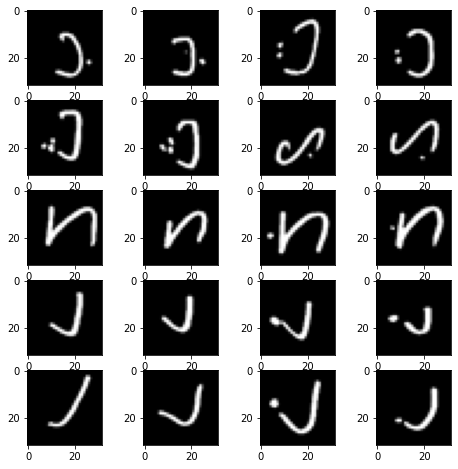

In [13]:
fig = plt.figure(figsize=(8, 8))                                                # Setting the figure size.
columns = 4                                                                     # Selecting the number of columns.
rows = 5                                                                        # Selectin the number of rows.
for i in range(1, columns*rows +1):                                             # Looping through rows & columns.
    img = df2.iloc[i].to_numpy().reshape((32,32))                         # Reshaping the image into its size 32x32
    fig.add_subplot(rows, columns, i)                                             # Adding the image to the plot
    plt.imshow(img, cmap='gray')                                                  # Showing the image using plt
plt.show()  

In [14]:
#Reshaping input images to 32x32x1
Train_X = df4.to_numpy().reshape(-1, 32, 32, 1)  # Training Images
print("train_X after reshaping: ",Train_X.shape) 
Test_X = df2.to_numpy().reshape(-1, 32, 32, 1) # Testing Images
print("test_X after reshaping: ",Test_X.shape)

train_X after reshaping:  (13439, 32, 32, 1)
test_X after reshaping:  (3359, 32, 32, 1)


In [15]:
Test_Y = df1.to_numpy()
Train_Y = df3.to_numpy()

print("test",Train_Y)
print("train",Test_Y)

test [[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]
train [[0.        ]
 [0.03703704]
 [0.03703704]
 ...
 [0.96296296]
 [1.        ]
 [1.        ]]


In [16]:
# convert class vectors to binary class matrices
num_classes = len(np.unique(train_y))
y_Train = keras.utils.to_categorical(Train_Y, num_classes)
y_Test = keras.utils.to_categorical(Test_Y, num_classes)
x_Train = Train_X.astype('float32')
x_Test = Test_X.astype('float32')
x_Train /= 255
x_Test /= 255
print('x_Train shape:', Train_X.shape)
print(Train_X.shape[0], 'train samples')
print(Train_X.shape[0], 'test samples')

x_Train shape: (13439, 32, 32, 1)
13439 train samples
13439 test samples


In [18]:
print("x train :",x_Train)
print("x train shape :",x_Train.shape)
print("x test :",x_Test)
print("x test shape :",x_Test.shape)

x train : [[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.

In [19]:
print("y train :",y_Train)
print("y train shape :",y_Train.shape)
print("y test :",y_Test)
print("y test shape :",y_Test.shape)

y train : [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
y train shape : (13439, 28)
y test : [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
y test shape : (3359, 28)


In [42]:
# Create a sequential model
model = Sequential()
# Add a convolutional layer with 32 filters, 3x3 kernel size, relu activation, and input shape of (width, height, channels)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D (64, (3, 3),padding='same', activation='relu'))
model.add(Conv2D (64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense (128, activation='relu'))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation='relu'))
model.add(Dense (num_classes, activation='softmax'))
model.summary()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
model.fit(x_Train, y_Train, epochs=10, batch_size=32, validation_data=(x_Test, y_Test))
CNN_Accuracy = model.evaluate(x_Test, y_Test)

Model: "sequential_90"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_95 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_92 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_96 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_97 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_93 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_89 (Flatten)        (None, 2304)            

In [43]:
print("CNN vs ANN Accuracy ")
CNN_Accuracy,ANN_Accuracy

CNN vs ANN Accuracy 


([0.22634616494178772, 0.964275062084198],
 [0.5493640303611755, 0.06877046823501587])